In [3]:
!unzip /content/drive/MyDrive/human.zip -d /content/images/

Archive:  /content/drive/MyDrive/human.zip
   creating: /content/images/train/
   creating: /content/images/train/female/
  inflating: /content/images/train/female/0764.png  
  inflating: /content/images/train/female/0766.png  
  inflating: /content/images/train/female/0768.png  
  inflating: /content/images/train/female/0771.png  
  inflating: /content/images/train/female/0772.png  
  inflating: /content/images/train/female/0773.png  
  inflating: /content/images/train/female/0775.png  
  inflating: /content/images/train/female/0776.png  
  inflating: /content/images/train/female/0777.png  
  inflating: /content/images/train/female/0778.png  
  inflating: /content/images/train/female/0779.png  
  inflating: /content/images/train/female/0781.png  
  inflating: /content/images/train/female/0785.png  
  inflating: /content/images/train/female/0787.png  
  inflating: /content/images/train/female/0789.png  
  inflating: /content/images/train/female/0791.png  
  inflating: /content/images/t

In [4]:
import os
# 기본 경로
base_dir = './images/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 남자 여자 이미지 경로
train_female_dir = os.path.join(train_dir, 'female')
train_male_dir = os.path.join(train_dir, 'male')
print(train_female_dir)
print(train_male_dir)

# 테스트에 사용되는 남자 여자 이미지 경로
validation_female_dir = os.path.join(validation_dir, 'female')
validation_male_dir = os.path.join(validation_dir, 'male')
print(validation_female_dir)
print(validation_male_dir)

./images/train/female
./images/train/male
./images/validation/female
./images/validation/male


In [5]:
train_female_fnames = os.listdir( train_female_dir )
train_male_fnames = os.listdir( train_male_dir )

print(train_female_fnames[:5])
print(train_male_fnames[:5])

['1237.png', '2136.png', '2187.png', '1473.png', '1346.png']
['3694.png', '2360.png', '2629.png', '0650.png', '1956.png']


In [6]:
print('Total training cat images :', len(os.listdir(train_female_dir)))
print('Total training dog images :', len(os.listdir(train_male_dir)))

print('Total validation cat images :', len(os.listdir(validation_female_dir)))
print('Total validation dog images :', len(os.listdir(validation_male_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


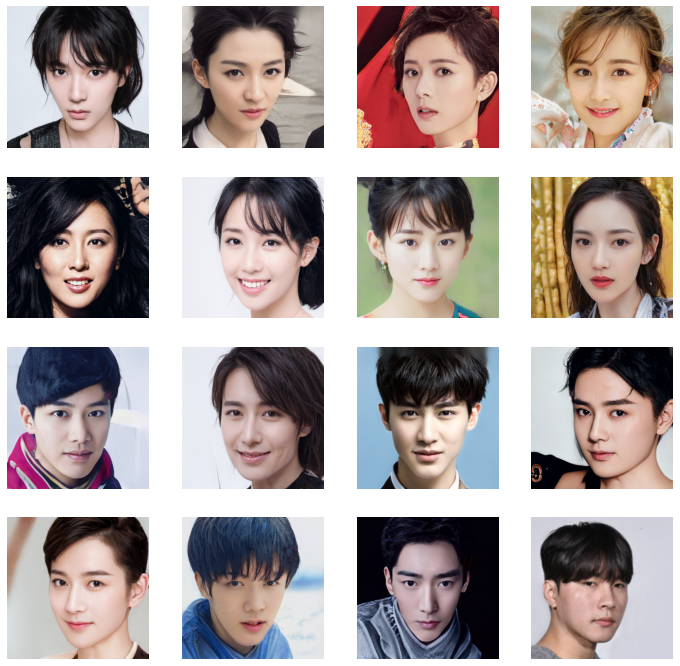

In [8]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_female_pix = [os.path.join(train_female_dir, fname)
                for fname in train_female_fnames[ pic_index-8:pic_index]]

next_male_pix = [os.path.join(train_male_dir, fname)
                for fname in train_male_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_female_pix+next_male_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100
100/100 - 36s - loss: 0.1900 - accuracy: 0.9255 - val_loss: 0.1567 - val_accuracy: 0.9350
Epoch 2/100
100/100 - 36s - loss: 0.1374 - accuracy: 0.9535 - val_loss: 0.2125 - val_accuracy: 0.9260
Epoch 3/100
100/100 - 36s - loss: 0.1039 - accuracy: 0.9625 - val_loss: 0.2573 - val_accuracy: 0.9200
Epoch 4/100
100/100 - 35s - loss: 0.0784 - accuracy: 0.9700 - val_loss: 0.1430 - val_accuracy: 0.9500
Epoch 5/100
100/100 - 35s - loss: 0.0584 - accuracy: 0.9800 - val_loss: 0.2215 - val_accuracy: 0.9390
Epoch 6/100
100/100 - 36s - loss: 0.0440 - accuracy: 0.9875 - val_loss: 0.2121 - val_accuracy: 0.9470
Epoch 7/100
100/100 - 35s - loss: 0.0232 - accuracy: 0.9905 - val_loss: 0.3347 - val_accuracy: 0.9330
Epoch 8/100
100/100 - 36s - loss: 0.0141 - accuracy: 0.9935 - val_loss: 0.2437 - val_accuracy: 0.9480
Epoch 9/100
100/100 - 36s - loss: 0.0137 - accuracy: 0.9960 - val_loss: 0.4109 - val_accuracy: 0.9410
Epoch 10/100
100/100 - 36s - loss: 0.0166 - accuracy: 0.9965 - val_loss: 0.3603 - 

In [17]:
!nvidia-smi

Wed Mar  3 11:43:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    41W / 300W |   1967MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

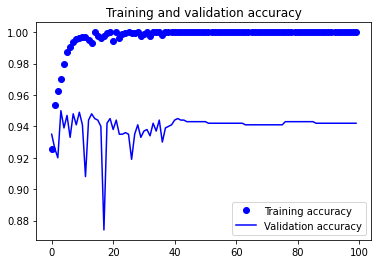

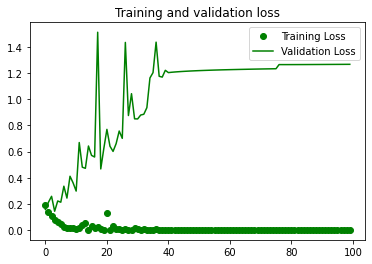

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a male")

  else:
    print(fn + " is a female")

Saving 2.jpg to 2.jpg
[1.]
2.jpg is a male


In [22]:
from keras.models import load_model
model.save('mnist_mlp_model.h5')

In [23]:
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

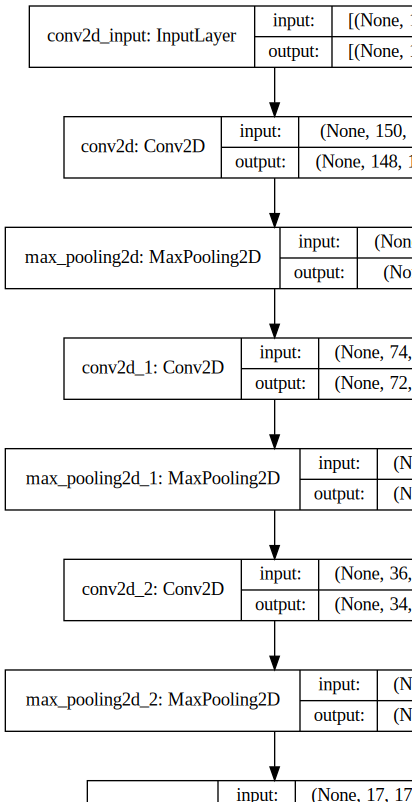

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))